In [3]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

#import scikitplot as skl
#sns.set()

In [4]:
#Let import the data now
df=pd.read_csv(r'C:\Users\SYS1\Downloads\Working\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems no missing values in our dataset lets move to distribution data

C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

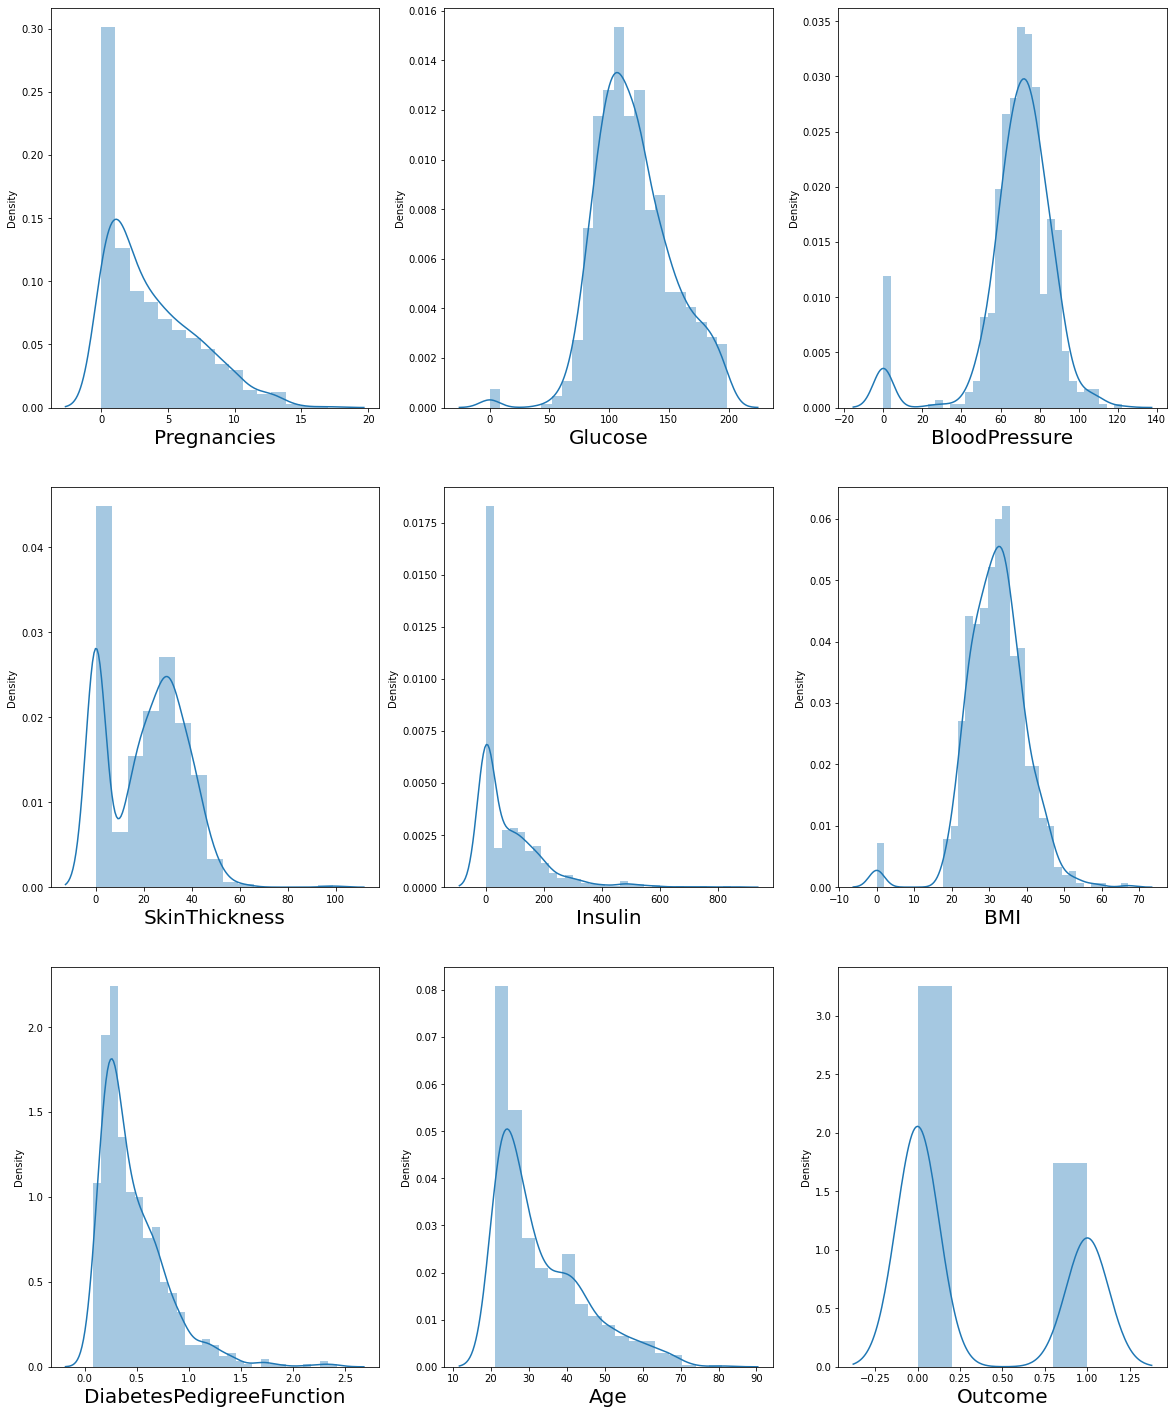

In [9]:
#lets see how data is distributed in every column:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:  #as there are 9 columns in data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

We can see a lot of skew data in pregnancy, glucose, BP,skinthickness,bmi we have to clear our data

In [10]:
#replacing zero values with mean of the columns:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

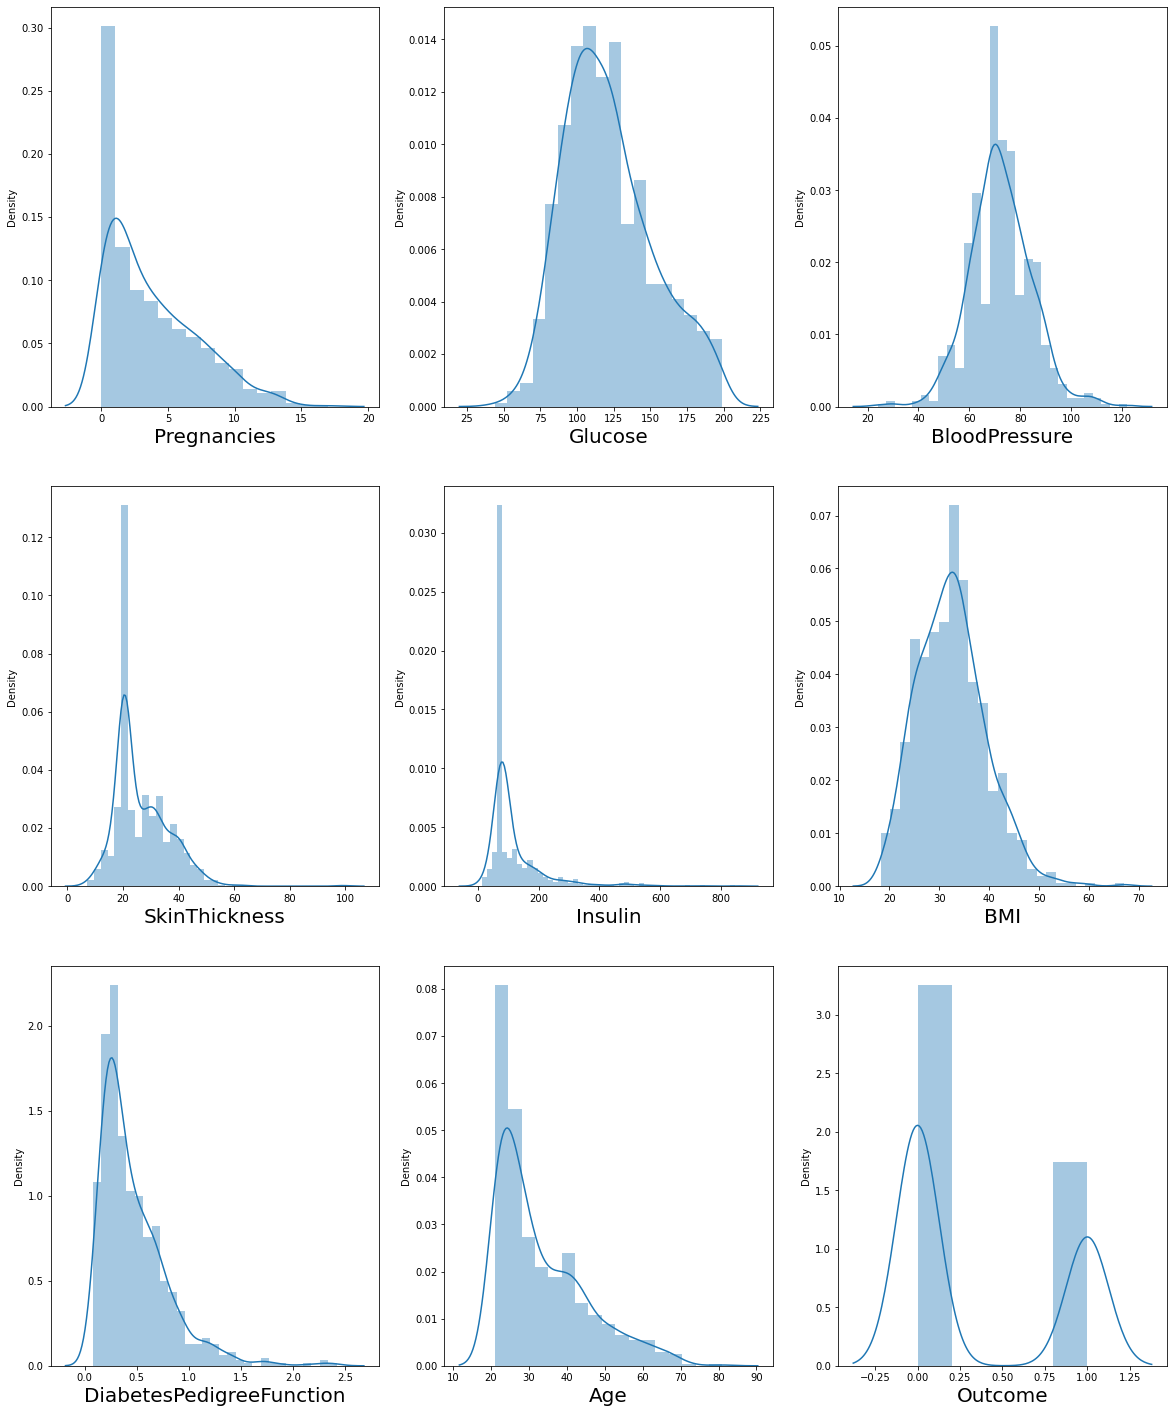

In [13]:
#Again lets see how the data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

But still skewness exists in data now lets use the basic plot to remove skewness

In [15]:
q=df['Pregnancies'].quantile(0.98)
#we are removing the top 2%data from pregnancies column
data_cleaned=df[df['Pregnancies']<q]
q=data_cleaned['BMI'].quantile(0.99)
#we are removing the top 1% data from BMI Column
data_cleaned=data_cleaned[data_cleaned['BMI']<q]
q=data_cleaned['SkinThickness'].quantile(0.99)
#we are removing the top 1% data from Skinthickness column
data_cleaned=data_cleaned[data_cleaned['SkinThickness']<q]
q=data_cleaned['Insulin'].quantile(0.98)
#we are removing the top 2 % data from Insulin column
data_cleaned=data_cleaned[data_cleaned['Insulin']<q]
q=data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
#we are removing the top 1%data from Diabetsedigreefunctiond
data_cleaned=data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q=data_cleaned['Age'].quantile(0.99)
#we are removing the top 1 % data from age column
data_cleaned=data_cleaned[data_cleaned['Age']<q]

C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

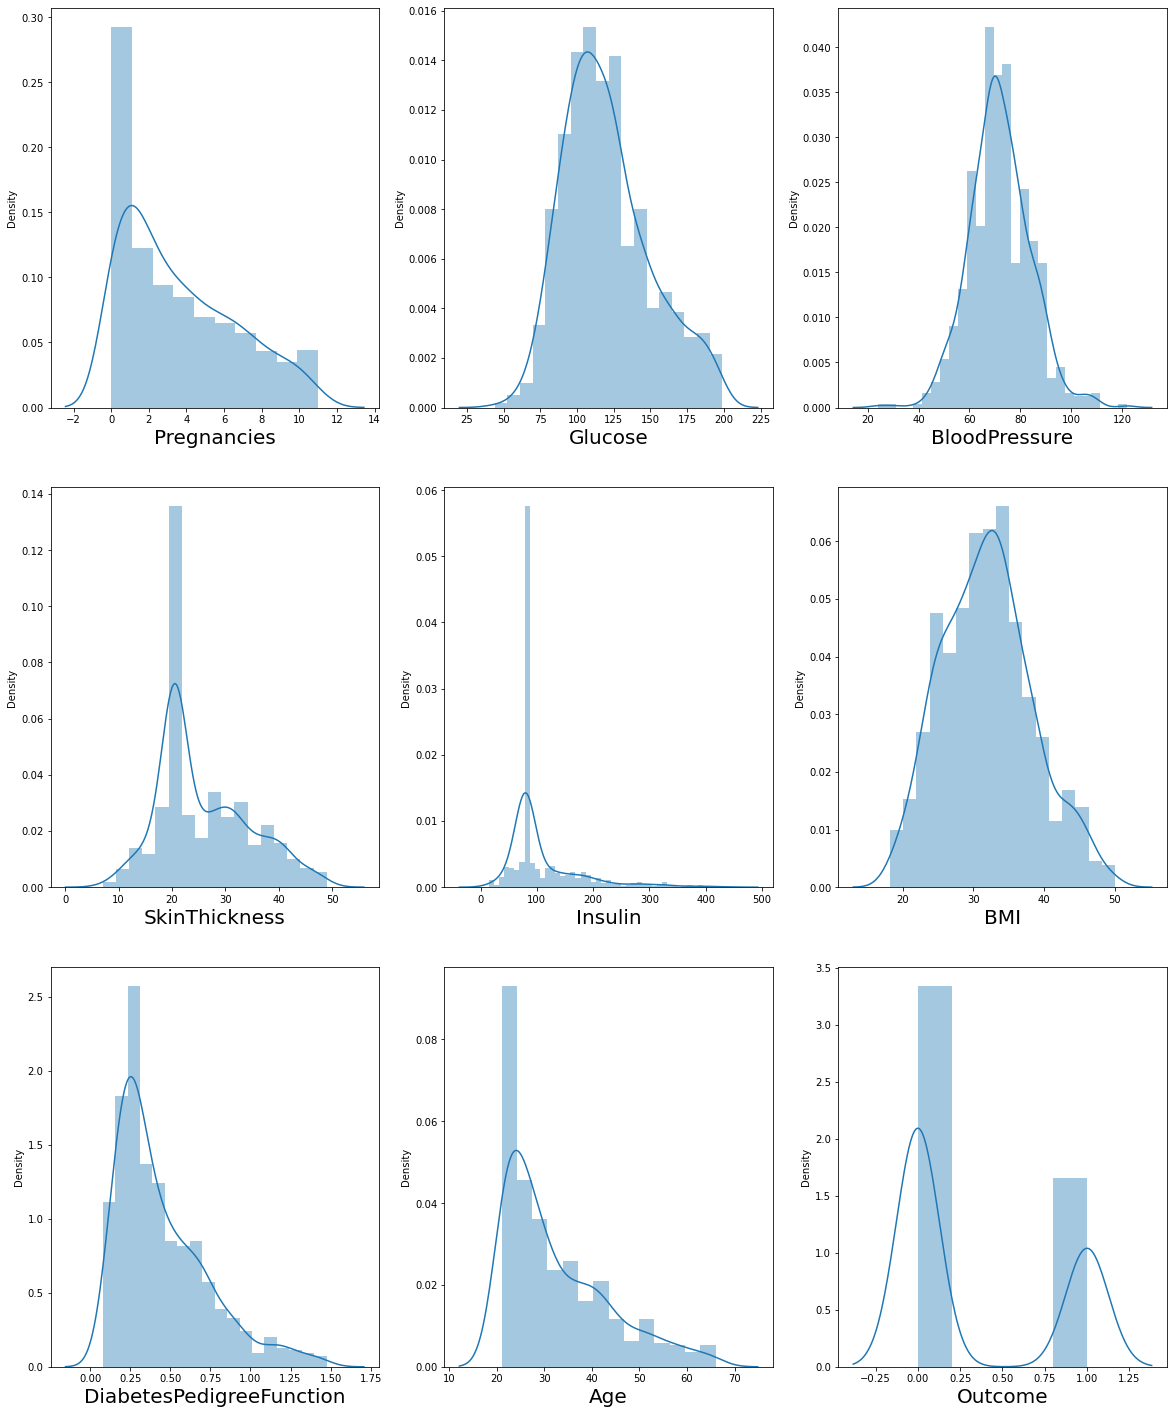

In [17]:
#Lets check how our data looks like
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylable('outcome',fontsize=20)
    plotnumber+=1
plt.show()      

Now our data looks better compare to earlier, now lets move to next

In [19]:
#Now lets check the relationship btw feature and label before that we will save x label and y label
X=df.drop(columns=['Outcome'])
y=df['Outcome']

C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SYS1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SYS1\anaconda3\l

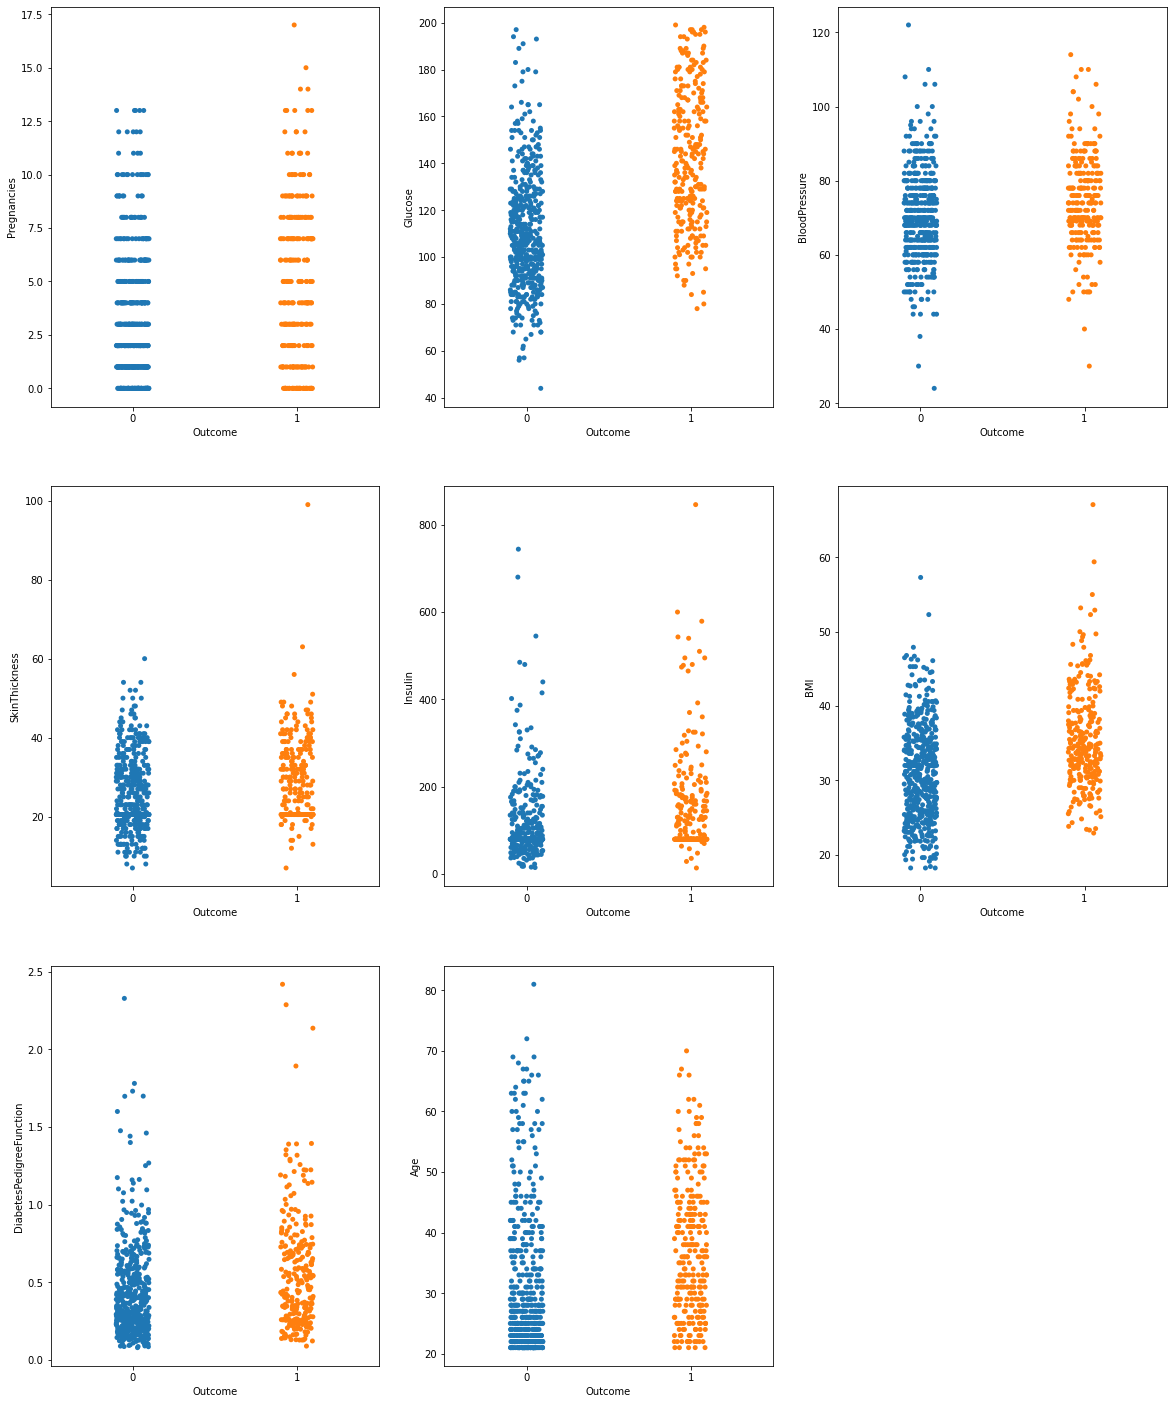

In [21]:
#Lets see how features are related to class
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.show()    

Above we can see as and when glucose increase diabetics get changes

In [22]:
#Lets check multicollenarity dependent variables. Before that we should scale our data, we are using standard scaler 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [23]:
#Now lets check the multicollinearity using VIF(Variance Inflation Factor)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]
vif['Features']=X.columns

#Lets check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [24]:
#train_test
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=22)


In [25]:
#Now we will use logistic regression
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [26]:
#Let's save the model
import pickle
#writing different model files to file:
with open('modelForPrediction.sav','wb')as f:
    pickle.dump(log_reg,f)
    
with open('standardscaler.sav','wb')as f:
    pickle.dump(scaler,f)

In [27]:
#Lets see how well our model performs on test datasets
y_pred=log_reg.predict(x_test)

In [28]:
#Checking the accuracy of the model
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7447916666666666

In [29]:
#Now's let go to the confusion matrix
conf_max=confusion_matrix(y_test,y_pred)
conf_max

array([[112,  16],
       [ 33,  31]], dtype=int64)

In [30]:
#Lets slice the confustion matrix
true_postive=conf_max[0][0]
false_positive=conf_max[0][1]
false_negative=conf_max[1][0]
true_negative=conf_max[1][1]

In [36]:
#Lets breakdown the formula of accuracy 
Accuracy=(true_postive+true_negative)/(true_negative+true_postive+false_negative,false_positive)
Accuracy

array([0.8125, 8.9375])